 Please upload your 'Classify Customer Churn.csv' file


Saving 5. Classify Customer Churn.csv to 5. Classify Customer Churn (1).csv
 Evaluation Metrics
Accuracy : 0.7925
Precision: 0.6444
Recall   : 0.4893

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



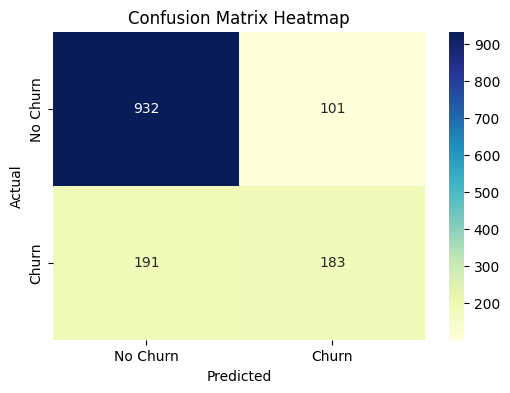

In [4]:
# Step 1: Upload the dataset
from google.colab import files
import io

print(" Please upload your 'Classify Customer Churn.csv' file")
uploaded = files.upload()

# Load the dataset
import pandas as pd

file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

#  Step 2: Explore & Clean the data
df.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

#  Step 3: Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    if column != 'Churn':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode target column separately
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

#  Step 4: Split into Train & Test sets
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Step 5: Train a Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#  Step 6: Make Predictions
y_pred = model.predict(X_test)

#  Step 7: Evaluate the Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(" Evaluation Metrics")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

#  Step 8: Confusion Matrix Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
